# Data Loading

In [1]:
import pandas as pd  
from IPython.display import display
import numpy as np
import seaborn as sns 

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
display(data.info(),
        data.describe(),
        data.size,
        data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


6912

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing 

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
print("NAN")
nan_counts = data.isna().sum()
print(nan_counts[nan_counts > 0])

print("\nNULL")
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0])

NAN
Series([], dtype: int64)

NULL
Series([], dtype: int64)


<Axes: xlabel='Outcome', ylabel='count'>

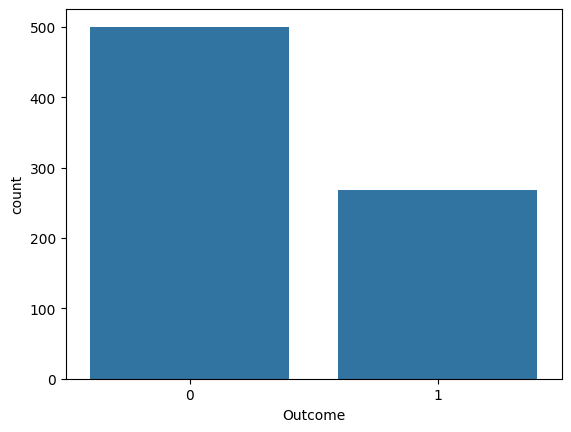

In [7]:
sns.barplot(data['Outcome'].value_counts())

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<Axes: xlabel='Outcome', ylabel='count'>

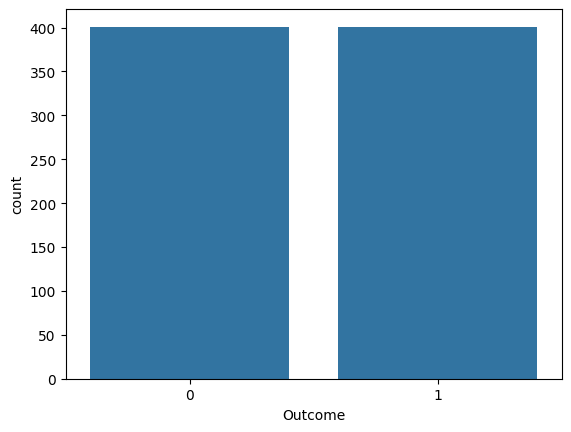

In [9]:
sns.barplot(y_train_resampled.value_counts())

# Model fit


Logistic Regression
- we fit the model to an quation to get the binary output

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7078
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        99
           1       0.57      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154



C:\Users\kakan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
- it marks the datapoints in a plane and then tries to fit a hyperplane through it with margins 
- it basically clusters the data into binary artifacts

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.56      0.67      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154



Random Forest Classifier
- it works on ensembled bootstrapping

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



Gausian NB
- wrks on the principal of gaussian distribution of data and finding probablity of a datapoint belonging to each of the clusters
- can work better to show important features with crossvalidation

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7208
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        99
           1       0.59      0.73      0.65        55

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



XGBoost
- using multiple trees and learning rate , we indentify the cluster to put the final datapoint in
- very high hypertunning required

In [14]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.56      0.73      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154

